In [2]:
# Packages

from PIL import Image
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

from keras import Model
from keras.preprocessing import image
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions

In [3]:
def get_data():
    data = load_digits()
    
    return data.images, data.target

x, y = get_data()

In [4]:
mobileNet_model = MobileNetV2(
    include_top=False,
    weights="imagenet"
)

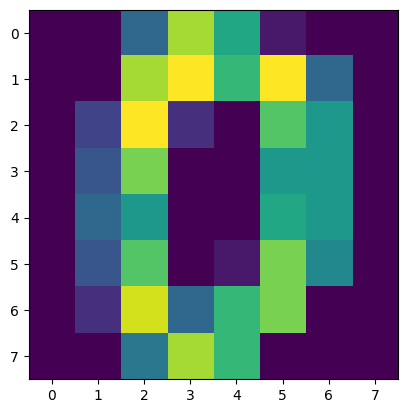

In [5]:
# x[0] image

plt.imshow(x[0])

In [6]:
def upgrade_color(img: Image.Image, number_of_upgrade = 10):
    img_data = img.getdata()
    new_img = []
    for item in img_data:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:
            new_img.append(item)
        else:
            new_color = [c + number_of_upgrade for index, c in enumerate(item) if index != 3]
            new_color.append(255)
            new_img.append(tuple(new_color))

    img.putdata(new_img)
    
    return img

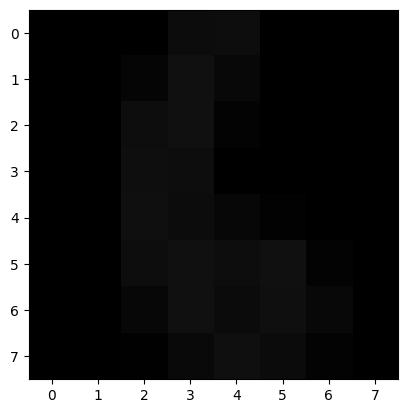

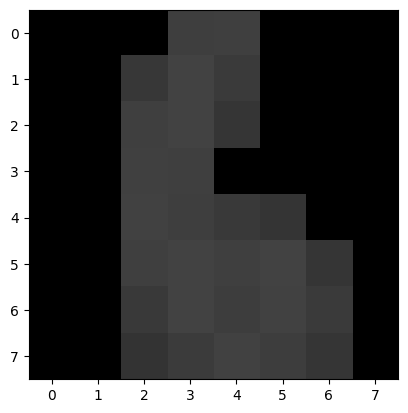

In [12]:
from PIL import ImageOps

image_index = 6

img_array = x[image_index]
img = Image.fromarray(img_array)

img = img.convert("RGBA")
img_data = img.getdata()

plt.imshow(img)
plt.show()

new_img = upgrade_color(img, 50)

plt.imshow(new_img)
plt.show()

In [8]:
new_x = np.empty((x.shape[0], x.shape[1], x.shape[2], 4), dtype=np.uint8)
for index, img in enumerate(x):
    img = Image.fromarray(img)
    img = img.convert("RGBA")
    new_img = upgrade_color(img, 15)
    
    new_x[index] = new_img

In [9]:
resized_x = np.empty((len(new_x), 224, 224, 4), dtype=np.uint8)

for index, img in enumerate(new_x):
    imgp = Image.fromarray(img)
    resized_img = imgp.resize((224, 224), Image.AFFINE)
    new_img = upgrade_color(resized_img, 10)
    resized_x[index] = new_img

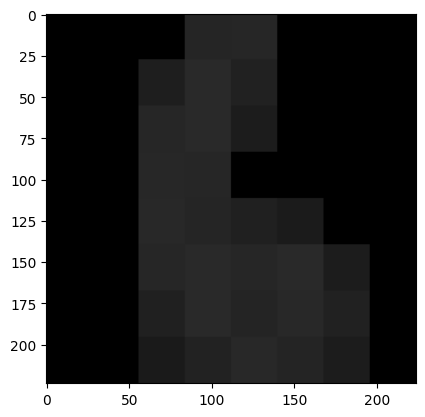

In [13]:
plt.imshow(resized_x[6])

In [39]:
final_x = np.empty((len(resized_x), 224, 224, 3), dtype=np.uint8)
for i, img in enumerate(resized_x):
    _img = Image.fromarray(img)
    _img = _img.convert("RGB")
    _img = upgrade_color(_img, 20)
    
    final_x[i] = _img   

In [42]:
_x = GlobalAveragePooling2D()(mobileNet_model.output)
output_layer = Dense(10, "softmax")(_x)

re_model = Model(inputs=mobileNet_model.input, outputs=output_layer)

for layer in re_model.layers[:-1]:
    layer.trainable = False
    
re_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

re_model.fit(x=final_x, y=y, epochs=20, verbose=2)

Epoch 1/20
57/57 - 44s - loss: 1.6758 - accuracy: 0.4697 - 44s/epoch - 764ms/step
Epoch 2/20
57/57 - 42s - loss: 0.9505 - accuracy: 0.7679 - 42s/epoch - 734ms/step
Epoch 3/20
57/57 - 54s - loss: 0.6863 - accuracy: 0.8464 - 54s/epoch - 943ms/step
Epoch 4/20
57/57 - 33s - loss: 0.5424 - accuracy: 0.8837 - 33s/epoch - 572ms/step
Epoch 5/20
57/57 - 34s - loss: 0.4591 - accuracy: 0.9026 - 34s/epoch - 594ms/step
Epoch 6/20
57/57 - 34s - loss: 0.3959 - accuracy: 0.9215 - 34s/epoch - 593ms/step
Epoch 7/20
57/57 - 34s - loss: 0.3510 - accuracy: 0.9366 - 34s/epoch - 594ms/step
Epoch 8/20
57/57 - 34s - loss: 0.3155 - accuracy: 0.9371 - 34s/epoch - 596ms/step
Epoch 9/20
57/57 - 34s - loss: 0.2966 - accuracy: 0.9377 - 34s/epoch - 602ms/step
Epoch 10/20
57/57 - 34s - loss: 0.2604 - accuracy: 0.9466 - 34s/epoch - 601ms/step
Epoch 11/20
57/57 - 30s - loss: 0.2417 - accuracy: 0.9488 - 30s/epoch - 535ms/step
Epoch 12/20
57/57 - 27s - loss: 0.2271 - accuracy: 0.9521 - 27s/epoch - 474ms/step
Epoch 13/20
5

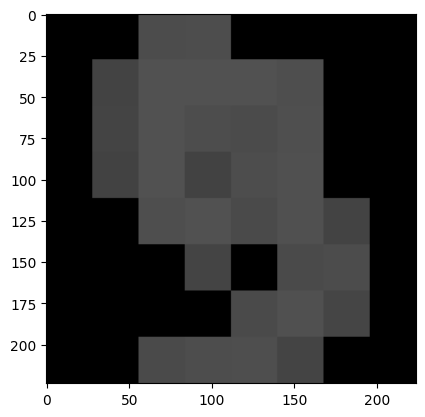

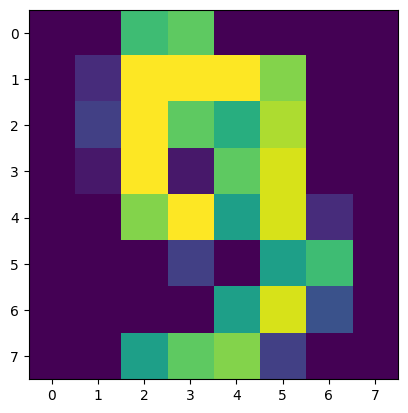

In [93]:
number_to_indentify = 9

plt.imshow(final_x[number_to_indentify])
plt.show()

plt.imshow(x[number_to_indentify])
plt.show()

In [1]:
single_example = np.expand_dims(final_x[number_to_indentify], axis=0)
prediction = re_model.predict(single_example)

max_prob_index = np.where(prediction[0] == np.max(prediction))[0][0]
y_label = y[max_prob_index]

print(f"El número es {y_label} con una probabilidad de {prediction[0][max_prob_index]} sobre 1")

NameError: name 'np' is not defined

In [7]:
img_path = "./nine.png"
img = Image.open(img_path)